<a href="https://colab.research.google.com/github/VeronicaIovchik/HW2/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note:** we use plotly plots that will show in Colab, but github doesnt support them

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import timeit
start = timeit.default_timer()

import pandas as pd
import numpy as np
from keras.utils import np_utils
import math
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
import matplotlib.patches as patches
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Flatten
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import shutil
import matplotlib.pyplot as plt
from IPython.display import Image, display
from PIL import ImageOps
from PIL import Image
from random import seed
from random import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers
from keras.backend import clear_session
from sklearn.metrics._plot.roc_curve import roc_curve
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization, Dropout, Flatten, Dense, Activation
from sklearn.metrics import accuracy_score

In [ ]:
X_test = np.load('/content/drive/MyDrive/deep learning/hw2/X_test.npy')
Y_train = np.load('/content/drive/MyDrive/deep learning/hw2/Y_train.npy')
X_train = np.load('/content/drive/MyDrive/deep learning/hw2/X_train.npy')
Y_test = np.load('/content/drive/MyDrive/deep learning/hw2/Y_test.npy')


In [ ]:
print(Y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3200,)
(3200, 180, 180, 3)
(800, 180, 180, 3)
(800,)


Normalize our data so we can how it looks

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0


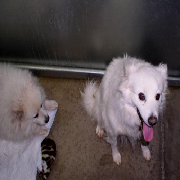
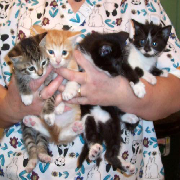
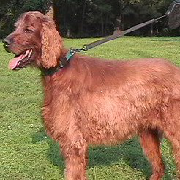
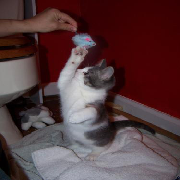
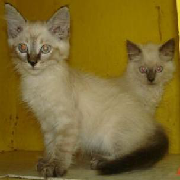
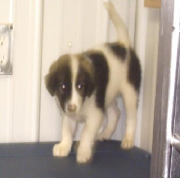
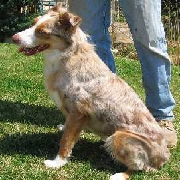
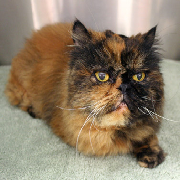
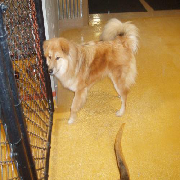
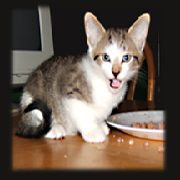
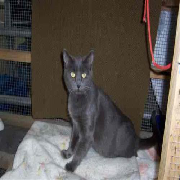
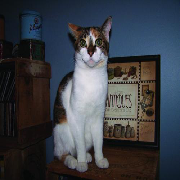
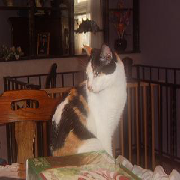
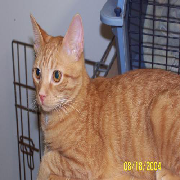
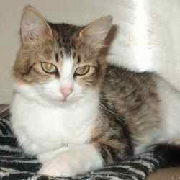
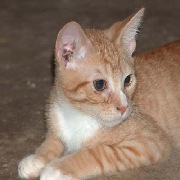
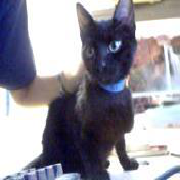
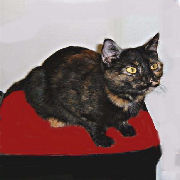
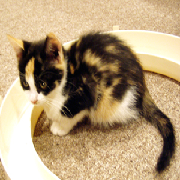
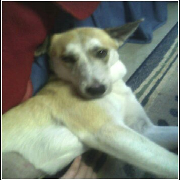
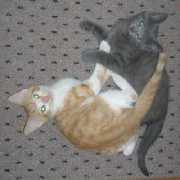
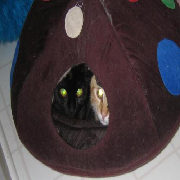
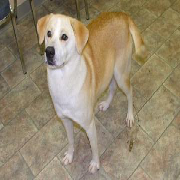
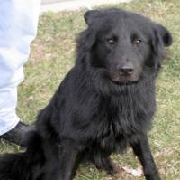
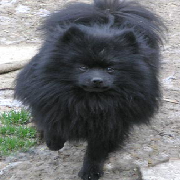
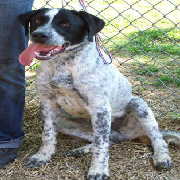
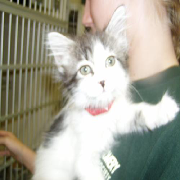
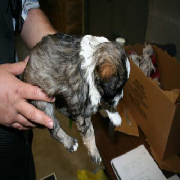
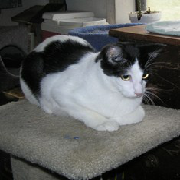
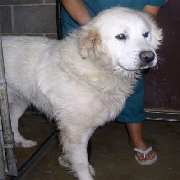

In [ ]:
fig = px.imshow(X_train[:30, :, :], binary_string=True, facet_col=0, facet_col_wrap=10)
fig.show()

In [ ]:
np.min(X_train),np.max(X_test),X_train.dtype

(0.0, 1.0, dtype('float64'))

We have 3200 train data and 800 test data so we will split to 0.25 to keep the validation in the same size of the test.

In [ ]:
X_train_val, X_val, Y_train_val, Y_val = train_test_split(X_train, Y_train, test_size=0.25)


In [ ]:
print(X_train_val.shape)
print(X_val.shape)
print(Y_train_val.shape)
print(Y_val.shape)

(2400, 180, 180, 3)
(800, 180, 180, 3)
(2400,)
(800,)


In [ ]:

Y_train_val = np_utils.to_categorical(Y_train_val)
Y_test = np_utils.to_categorical(Y_test)
Y_val = np_utils.to_categorical(Y_val)
     

In [ ]:
Y_train = np_utils.to_categorical(Y_train)

In [ ]:
print(Y_val.shape)
print(Y_test.shape)
print(Y_train_val.shape)


(800, 2)
(800, 2)
(2400, 2)


Let's do the first simple model

In [ ]:
seed(1)
model_1 = Sequential()
model_1.add(layers.Input(shape=(180, 180, 3)))
model_1.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(layers.Conv2D(512, kernel_size=(3, 3), activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dense(64, activation='relu'))
model_1.add(Flatten())
model_1.add(layers.Dropout(0.5))
model_1.add(Dense(2, activation='sigmoid'))

In [ ]:
model_1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 20, 20, 128)    

Now let's check how good is our model based on the validation

In [ ]:

model1_history = model_1.fit(X_train_val, Y_train_val, validation_data=(X_val, Y_val), batch_size=256, epochs=20)

Epoch 1/20
10/10 [==============================] - 2s 127ms/step - loss: 0.6956 - accuracy: 0.5142 - val_loss: 0.6872 - val_accuracy: 0.5175
Epoch 2/20
10/10 [==============================] - 1s 90ms/step - loss: 0.7084 - accuracy: 0.5600 - val_loss: 0.6810 - val_accuracy: 0.5838
Epoch 3/20
10/10 [==============================] - 1s 85ms/step - loss: 0.6853 - accuracy: 0.5596 - val_loss: 0.6748 - val_accuracy: 0.5825
Epoch 4/20
10/10 [==============================] - 1s 87ms/step - loss: 0.6953 - accuracy: 0.5813 - val_loss: 0.6670 - val_accuracy: 0.6587
Epoch 5/20
10/10 [==============================] - 1s 86ms/step - loss: 0.6689 - accuracy: 0.5917 - val_loss: 0.6491 - val_accuracy: 0.6350
Epoch 6/20
10/10 [==============================] - 1s 86ms/step - loss: 0.6675 - accuracy: 0.5950 - val_loss: 0.6344 - val_accuracy: 0.6475
Epoch 7/20
10/10 [==============================] - 1s 87ms/step - loss: 0.6816 - accuracy: 0.5758 - val_loss: 0.6805 - val_accuracy: 0.5263
Epoch 8/20
1

In [ ]:
def plot_history(model_history, yrange):
 
    acc = model_history.history['accuracy']
    val_acc = model_history.history['val_accuracy']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    plt.xlabel('Number of epoches')
    plt.ylabel('Accuracy')
    # Plot training and validation loss per epoch
    plt.figure()
    
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Number of epoches')
    plt.ylabel('loss')
    plt.show()

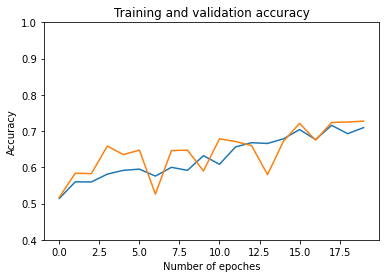

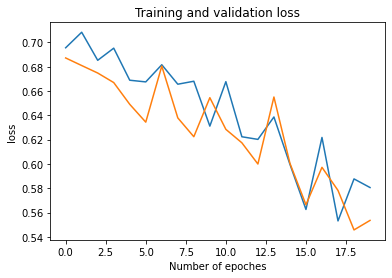

In [ ]:
plot_history(model1_history, (0.4, 1.))

In [ ]:
print('The best validation accuracy is:', max(model1_history.history['val_accuracy']))

The best validation accuracy is: 0.7275000214576721


Let's Move to the second Model

In [ ]:
#1
seed(1)
model2=Sequential()
model2.add(layers.Input(shape=(180, 180, 3)))
model2.add(Conv2D(32,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(256,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(2,activation='sigmoid'))


In [ ]:
model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    
    


In [ ]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_42 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_43 (Bat  (None, 87, 87, 64)     

Now check how good is our model on the validation

In [ ]:
model2_history = model2.fit(X_train_val, Y_train_val, validation_data=(X_val, Y_val),   epochs=20)
        

Epoch 1/20
75/75 [==============================] - 3s 24ms/step - loss: 0.7863 - accuracy: 0.5492 - val_loss: 0.7069 - val_accuracy: 0.4900
Epoch 2/20
75/75 [==============================] - 1s 18ms/step - loss: 0.7117 - accuracy: 0.5821 - val_loss: 0.6924 - val_accuracy: 0.5300
Epoch 3/20
75/75 [==============================] - 1s 18ms/step - loss: 0.6794 - accuracy: 0.5904 - val_loss: 0.7555 - val_accuracy: 0.5100
Epoch 4/20
75/75 [==============================] - 1s 18ms/step - loss: 0.6760 - accuracy: 0.6033 - val_loss: 0.7056 - val_accuracy: 0.5075
Epoch 5/20
75/75 [==============================] - 1s 18ms/step - loss: 0.6570 - accuracy: 0.6217 - val_loss: 0.7061 - val_accuracy: 0.5050
Epoch 6/20
75/75 [==============================] - 1s 18ms/step - loss: 0.6362 - accuracy: 0.6404 - val_loss: 0.7029 - val_accuracy: 0.5163
Epoch 7/20
75/75 [==============================] - 1s 18ms/step - loss: 0.6082 - accuracy: 0.6637 - val_loss: 0.6978 - val_accuracy: 0.5738
Epoch 8/20
75

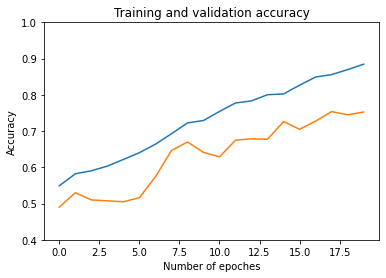

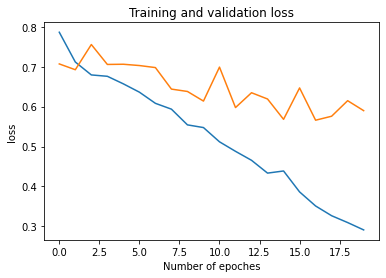

In [ ]:
plot_history(model2_history, (0.4, 1.))

In [ ]:
print('The best validation accuracy is:', max(model2_history.history['val_accuracy']))

The best validation accuracy is: 0.7512500286102295


We can see there is such of improvment!

Let's go to the last model!

In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(180,180)+(3,),
    pooling='max',
    classes=2,
    classifier_activation="sigmoid",
)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
sub_model = tf.keras.models.Model(inputs=base_model.inputs, outputs=[base_model.get_layer('block4_conv3').output])
sub_model.trainable = False
sub_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0   

In [ ]:
inputs = layers.Input(shape=(180, 180, 3))
vgg_output = sub_model(inputs)

x = layers.Conv2D(32, (3, 3), activation='relu')(vgg_output)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)

vgg_model = tf.keras.models.Model(inputs=[inputs], outputs=[outputs])








In [ ]:
vgg_model = Sequential(vgg_model)
vgg_model.summary()

vgg_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 2)                 8109986   
                                                                 
Total params: 8,109,986
Trainable params: 472,546
Non-trainable params: 7,637,440
_________________________________________________________________


In [ ]:
vgg_history = vgg_model.fit(X_train_val, Y_train_val, validation_data=(X_val, Y_val),epochs=20)


Epoch 1/20
75/75 [==============================] - 2s 27ms/step - loss: 0.0219 - accuracy: 0.9937 - val_loss: 0.2961 - val_accuracy: 0.9337
Epoch 2/20
75/75 [==============================] - 2s 23ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.3340 - val_accuracy: 0.9212
Epoch 3/20
75/75 [==============================] - 2s 23ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.5099 - val_accuracy: 0.8900
Epoch 4/20
75/75 [==============================] - 2s 23ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.4996 - val_accuracy: 0.8788
Epoch 5/20
75/75 [==============================] - 2s 23ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 0.3067 - val_accuracy: 0.9300
Epoch 6/20
75/75 [==============================] - 2s 23ms/step - loss: 0.0229 - accuracy: 0.9921 - val_loss: 0.3985 - val_accuracy: 0.9162
Epoch 7/20
75/75 [==============================] - 2s 23ms/step - loss: 0.0216 - accuracy: 0.9912 - val_loss: 0.3961 - val_accuracy: 0.9162
Epoch 8/20
75

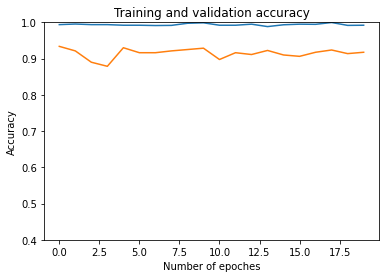

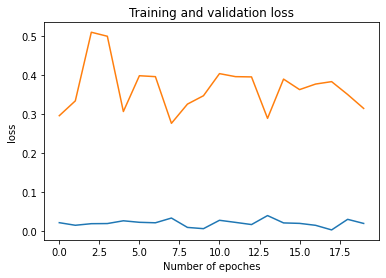

In [ ]:
plot_history(vgg_history, (0.4, 1.))

In [ ]:
print('The best validation accuracy is:', max(vgg_history.history['val_accuracy']))

The best validation accuracy is: 0.9337499737739563


Now lets train our models on the all train data and check the accuracy

Let's Check all the models on the test data

In [ ]:
models = [model_1,model2,vgg_model]

for model in models:
    acc= accuracy_score(Y_test, np.round(model.predict(X_test)))
    print('Name of the model: ',model, 'Score: ',acc)
    


25/25 [==============================] - 0s 6ms/step
Name of the model:  <keras.engine.sequential.Sequential object at 0x7f8cfc1b8c70> Score:  0.7475
25/25 [==============================] - 0s 6ms/step
Name of the model:  <keras.engine.sequential.Sequential object at 0x7f8cfb189280> Score:  0.8175
25/25 [==============================] - 0s 14ms/step
Name of the model:  <keras.engine.sequential.Sequential object at 0x7f8e00cdd580> Score:  0.92


We can see we got the best test accuracy in the last model

Now we will train the models on the full train data

In [ ]:
#model 1 
model_1_history = model_1.fit(X_train, Y_train,epochs=20)

Epoch 1/20
100/100 [==============================] - 1s 12ms/step - loss: 0.5798 - accuracy: 0.6994
Epoch 2/20
100/100 [==============================] - 1s 13ms/step - loss: 0.5389 - accuracy: 0.7297
Epoch 3/20
100/100 [==============================] - 1s 13ms/step - loss: 0.5217 - accuracy: 0.7375
Epoch 4/20
100/100 [==============================] - 1s 13ms/step - loss: 0.4795 - accuracy: 0.7728
Epoch 5/20
100/100 [==============================] - 1s 13ms/step - loss: 0.4560 - accuracy: 0.7900
Epoch 6/20
100/100 [==============================] - 1s 13ms/step - loss: 0.4228 - accuracy: 0.8138
Epoch 7/20
100/100 [==============================] - 1s 12ms/step - loss: 0.3992 - accuracy: 0.8206
Epoch 8/20
100/100 [==============================] - 1s 13ms/step - loss: 0.3727 - accuracy: 0.8316
Epoch 9/20
100/100 [==============================] - 1s 12ms/step - loss: 0.3510 - accuracy: 0.8531
Epoch 10/20
100/100 [==============================] - 1s 13ms/step - loss: 0.3309 - accura

In [ ]:
best1_train_acc = max(model_1_history.history['accuracy'])

In [ ]:
#model 2
model_2_history =model2.fit(X_train, Y_train,epochs=20)

Epoch 1/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0650 - accuracy: 0.9787
Epoch 2/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0669 - accuracy: 0.9753
Epoch 3/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0608 - accuracy: 0.9766
Epoch 4/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0492 - accuracy: 0.9825
Epoch 5/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0656 - accuracy: 0.9762
Epoch 6/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0716 - accuracy: 0.9750
Epoch 7/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0680 - accuracy: 0.9750
Epoch 8/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0802 - accuracy: 0.9697
Epoch 9/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0737 - accuracy: 0.9712
Epoch 10/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0681 - accura

In [ ]:
best2_train_acc = max(model_2_history.history['accuracy'])

In [ ]:
vgg_model_history =vgg_model.fit(X_train, Y_train,epochs=20)


Epoch 1/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0127 - accuracy: 0.9956
Epoch 2/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 3/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0110 - accuracy: 0.9969
Epoch 4/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0101 - accuracy: 0.9962
Epoch 5/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 6/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0184 - accuracy: 0.9950
Epoch 7/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0104 - accuracy: 0.9956
Epoch 8/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0150 - accuracy: 0.9959
Epoch 9/20
100/100 [==============================] - 2s 19ms/step - loss: 0.0105 - accuracy: 0.9959
Epoch 10/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0044 - accura

In [ ]:
best3_train_acc = max(vgg_model_history.history['accuracy'])

In [ ]:
pred1=(np.round(model_1.predict(X_test)))
pred2=(np.round(model2.predict(X_test)))
pred3=(np.round(vgg_model.predict(X_test)))

25/25 [==============================] - 0s 14ms/step


In [ ]:
models = [model_1,model2,vgg_model]
preds = [pred1,pred2,pred3]
accuracy= []
for i in range(len(models)):
    acc= accuracy_score(Y_test,preds[i] )
    accuracy.append(acc)
    print('Name of the model: ',models[i], 'Score: ',acc)
    

Name of the model:  <keras.engine.sequential.Sequential object at 0x7f8cfc1b8c70> Score:  0.81
Name of the model:  <keras.engine.sequential.Sequential object at 0x7f8cfb189280> Score:  0.8175
Name of the model:  <keras.engine.sequential.Sequential object at 0x7f8e00cdd580> Score:  0.92


We can see the best score is on the VGG model 92% accuracy

**Models Evaluation**

In [ ]:
def create_conf_metrix (pred,model_str_name):
  d = tf.math.confusion_matrix(
      Y_test[:,0],
      pred[:,0],
      num_classes=2,
      dtype=tf.dtypes.int32
  )
  
  return px.imshow(d,y=["Dog","Cat"],x=["Dog","Cat"],title =model_str_name)


In [ ]:
create_conf_metrix(pred1,"2 conv model 1 confusion matrix")


In [ ]:
create_conf_metrix(pred2,"CNN model 2 confusion matrix")


In [ ]:
create_conf_metrix(pred3,"VGG model 3 confusion matrix")


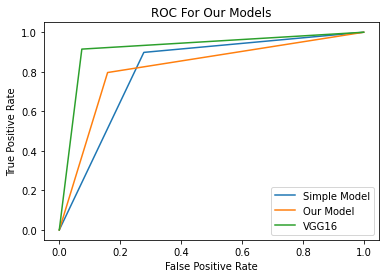

In [ ]:
pred_list = [pred1[:,0],pred2[:,0],pred3[:,0]]
labels = ["Simple Model","Our Model","VGG16"]
for i in range(0,3):
    fpr, tpr, thresholds = roc_curve(Y_test[:,0], pred_list[i])
    plt.plot(fpr,tpr,label=labels[i])
plt.title("ROC For Our Models")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
def turn_pred_to_binary(pred):
  pred_binary =[]
  for i in range(len(pred)):
    if pred1[i,:][0]>pred[i,:][1]:
      pred_binary.append([1.0,0.0])
    else:
      pred_binary.append([0.0,1.0])
  pred_binary = np.array(pred_binary)
  for i in range(0,20):
    print(Y_test[i] == pred_binary[i],i,Y_test[i],pred_binary[i])
  return 0

In [ ]:
turn_pred_to_binary(pred1)

[ True  True] 0 [1. 0.] [1. 0.]
[ True  True] 1 [0. 1.] [0. 1.]
[ True  True] 2 [1. 0.] [1. 0.]
[ True  True] 3 [0. 1.] [0. 1.]
[ True  True] 4 [0. 1.] [0. 1.]
[ True  True] 5 [1. 0.] [1. 0.]
[ True  True] 6 [1. 0.] [1. 0.]
[ True  True] 7 [1. 0.] [1. 0.]
[ True  True] 8 [1. 0.] [1. 0.]
[ True  True] 9 [1. 0.] [1. 0.]
[ True  True] 10 [0. 1.] [0. 1.]
[ True  True] 11 [0. 1.] [0. 1.]
[ True  True] 12 [1. 0.] [1. 0.]
[ True  True] 13 [1. 0.] [1. 0.]
[False False] 14 [0. 1.] [1. 0.]
[ True  True] 15 [0. 1.] [0. 1.]
[ True  True] 16 [1. 0.] [1. 0.]
[ True  True] 17 [1. 0.] [1. 0.]
[False False] 18 [1. 0.] [0. 1.]
[ True  True] 19 [1. 0.] [1. 0.]


0


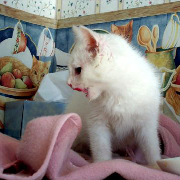

In [ ]:
px.imshow(X_test[0],title="Cat has classified as a cat in model 1")


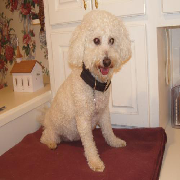

In [ ]:
px.imshow(X_test[14],title="Dog has classified as a cat in model 1")

In [ ]:
turn_pred_to_binary(pred2)

[ True  True] 0 [1. 0.] [1. 0.]
[ True  True] 1 [0. 1.] [0. 1.]
[ True  True] 2 [1. 0.] [1. 0.]
[ True  True] 3 [0. 1.] [0. 1.]
[ True  True] 4 [0. 1.] [0. 1.]
[ True  True] 5 [1. 0.] [1. 0.]
[ True  True] 6 [1. 0.] [1. 0.]
[ True  True] 7 [1. 0.] [1. 0.]
[ True  True] 8 [1. 0.] [1. 0.]
[ True  True] 9 [1. 0.] [1. 0.]
[ True  True] 10 [0. 1.] [0. 1.]
[ True  True] 11 [0. 1.] [0. 1.]
[False False] 12 [1. 0.] [0. 1.]
[False False] 13 [1. 0.] [0. 1.]
[ True  True] 14 [0. 1.] [0. 1.]
[ True  True] 15 [0. 1.] [0. 1.]
[ True  True] 16 [1. 0.] [1. 0.]
[ True  True] 17 [1. 0.] [1. 0.]
[False False] 18 [1. 0.] [0. 1.]
[ True  True] 19 [1. 0.] [1. 0.]


0


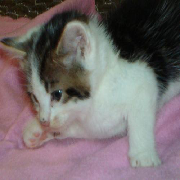

In [ ]:
px.imshow(X_test[12],title="Cat has classified as a dog in model 2")

In [ ]:
turn_pred_to_binary(pred3)

[ True  True] 0 [1. 0.] [1. 0.]
[ True  True] 1 [0. 1.] [0. 1.]
[ True  True] 2 [1. 0.] [1. 0.]
[ True  True] 3 [0. 1.] [0. 1.]
[ True  True] 4 [0. 1.] [0. 1.]
[ True  True] 5 [1. 0.] [1. 0.]
[ True  True] 6 [1. 0.] [1. 0.]
[ True  True] 7 [1. 0.] [1. 0.]
[ True  True] 8 [1. 0.] [1. 0.]
[ True  True] 9 [1. 0.] [1. 0.]
[ True  True] 10 [0. 1.] [0. 1.]
[ True  True] 11 [0. 1.] [0. 1.]
[ True  True] 12 [1. 0.] [1. 0.]
[ True  True] 13 [1. 0.] [1. 0.]
[ True  True] 14 [0. 1.] [0. 1.]
[ True  True] 15 [0. 1.] [0. 1.]
[ True  True] 16 [1. 0.] [1. 0.]
[ True  True] 17 [1. 0.] [1. 0.]
[False False] 18 [1. 0.] [0. 1.]
[ True  True] 19 [1. 0.] [1. 0.]


0


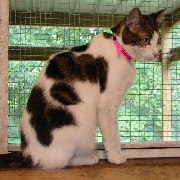

In [ ]:
px.imshow(X_test[18],title="Cat has classified as a dog in model 3")

In [ ]:
import pandas as pd
# Keep keys the same, and replace values according to your results and the specified type 

results = {'model': ['Basic CNN', 'Our Model', 'VGG16'],
           'Test score (Accuracy)': [accuracy[0], accuracy[1], accuracy[2]],
           'Train score (Accuracy)': [best1_train_acc, best2_train_acc, best3_train_acc],
           'Number of trainable parameters': [model_1.count_params(), model2.count_params(), vgg_model.count_params()],
           'Number of layers': [len(model_1.layers), len(model2.layers), len(vgg_model.layers)],
           'Regularization methods': ['No regularization','BatchNormalization,Dropout','BatchNormalization,Dropout'],
           'Number of epochs': ['20', '20', '20'],
           'Loss function': ['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy'],
           'Optimizer': ['rmsprop', 'adam', 'adam']
           }

df = pd.DataFrame(results)
df


,model,Test score (Accuracy),Train score (Accuracy),Number of trainable parameters,Number of layers,Regularization methods,Number of epochs,Loss function,Optimizer
0,Basic CNN,0.8100,0.955625,726786,12,No regularization,20,binary_crossentropy,rmsprop
1,Our Model,0.8175,0.984688,2976162,28,"BatchNormalization,Dropout",20,binary_crossentropy,adam
2,VGG16,0.9200,0.999687,8109986,1,"BatchNormalization,Dropout",20,binary_crossentropy,adam


In [ ]:
import os
df.to_csv(os.path.join(os.getcwd(), 'hw2.csv'))